# Plotting directly with Matplotlib

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Import Libraries](#0)<br>
2.  [Fetching Data](#1) <br>
3.  [Line Plot](#6) <br>
4.  [Scatter Plot](#8) <br>
5.  [Bar Plot](#10) <br>
6.  [Histogram](#12) <br>
7.  [Pie](#14) <br>
8.  [Subplotting](#16) <br>
</div>


Import Libraries

In [1]:
import numpy as np # useful for scientific computing in python
import pandas as pd # primary data structure library

# use the inline backend to generate the plots within the browser
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

# check for latest version of matplotlib
print('Matplotlib Version: ', mpl.__version__)

Matplotlib Version:  3.10.0


# Fetching Data<a id="1"></a>

Dataset: Immigration to Canada from 1980 to 2013 - [International migration flows to and from selected countries - The 2015 revision](https://www.un.org/development/desa/pd/data/international-migration-flows) from United Nation's website.<br>
In this lab, we will focus on the Canadian Immigration data and use the *already cleaned dataset* and can be fetched from <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv">here</a>.
<br><br>
You can refer to the lab on data pre-processing wherein this dataset is cleaned for a quick refresh your Panads skill [Data pre-processing with Pandas](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/june2023_updates/Module%201/DV0101EN-Exercise-Dataset-Preprocessing-Exploring-with-Pandas.ipynb)

In [2]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv"

df_can = pd.read_csv(URL)

df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [6]:
# Let's find out how many entries there are in our dataset
df_can.shape

(195, 39)

Set the country name as index - useful for quickly looking up countries using .loc method

In [7]:
df_can.set_index('Country', inplace=True)

df_can.head()


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [8]:
df_can.shape

(195, 38)

In [9]:
# Let's create a list of years from 1980 - 2013. This will be useful when we start plotting
years = list(map(str, range(1980, 2014)))

# OR (we can also use the next line

# years = np.arange(1980, 2014)  # both are same mean

# Line Plot

A line plot displays the relationship between two continuous variables over a continuous interval, showing the trend or pattern of the data.<br><br>Let's created a line plot to visualize the immigrants (to Canada) trend during 1980 to 2013.<br>We need the Total of year-wise immigrants,<br><br>We will create a new dataframe for only columns containing the years<br> then, we will apply sum() on the dataframe<br><br>You can do create a line plot directly on **axes** by calling plot function **plot()**

In [11]:
df_line = df_can[years]

total_immigrants = df_line.sum()
total_immigrants

1980     99137
1981    110563
1982    104271
1983     75550
1984     73417
1985     69978
1986     86048
1987    134771
1988    139306
1989    164432
1990    188054
1991    207509
1992    221687
1993    222049
1994    193665
1995    187712
1996    200085
1997    192885
1998    160727
1999    179818
2000    216712
2001    242643
2002    223111
2003    217297
2004    232083
2005    257457
2006    247057
2007    232405
2008    243047
2009    248768
2010    276956
2011    246194
2012    256222
2013    257537
dtype: int64

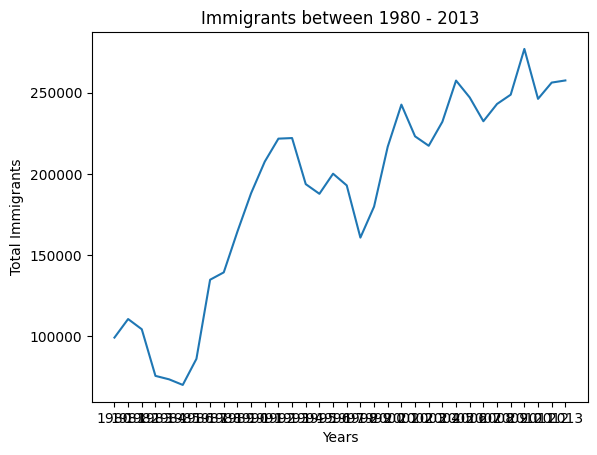

In [15]:
# Create figure and axes
fig, ax = plt.subplots()

ax.plot(total_immigrants)

ax.set_title('Immigrants between 1980 - 2013')
ax.set_xlabel('Years')
ax.set_ylabel('Total Immigrants')

plt.show()

#### The plot function populated the x-axis with the index values (years), and the y-axis with the column values (population). <br>However, notice how the years were not displayed because they are of type string.<br> <br>Therefore, let's change the type of the index values to integer for plotting.


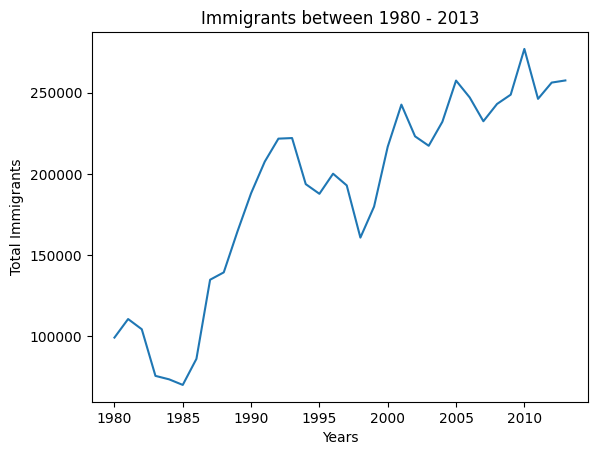

In [18]:
fig, ax = plt.subplots()

# Changing the index type to integer
total_immigrants.index = total_immigrants.index.map(int)

# plot the line
ax.plot(total_immigrants)

ax.set_title('Immigrants between 1980 - 2013')

ax.set_xlabel('Years')
ax.set_ylabel('Total Immigrants')

plt.show()

#### Let's now customize the above plot's appearance 


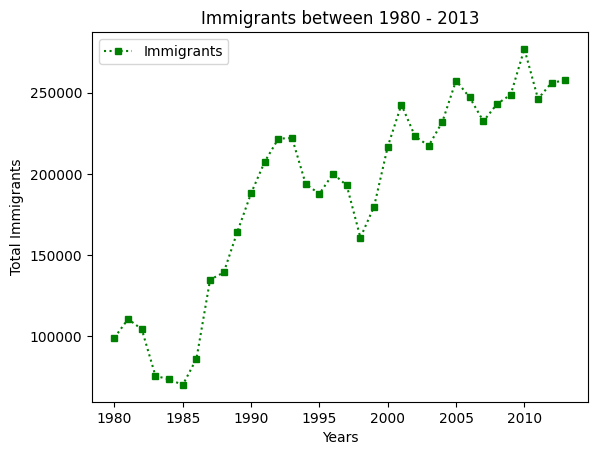

In [19]:
fig, ax = plt.subplots()

total_immigrants.index = total_immigrants.index.map(int)

ax.plot(total_immigrants,
        marker = 's',
        markersize = 5,
        color = 'green',
        linestyle = 'dotted')

ax.set_title('Immigrants between 1980 - 2013')

ax.set_xlabel('Years')
ax.set_ylabel('Total Immigrants')
ax.legend(['Immigrants'])

plt.show()

#### Let's include the background grid, a legend and try to change the limits on the axis

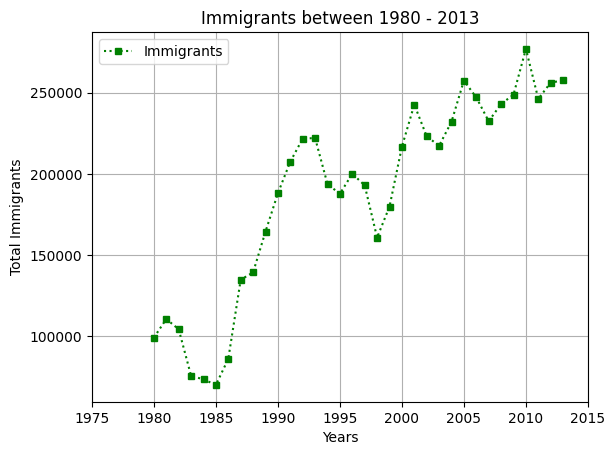

In [26]:
fig, ax = plt.subplots()

ax.plot(total_immigrants,
        marker = 's', 
        markersize = 5,
        color = 'green',
        linestyle = 'dotted')

ax.set_title('Immigrants between 1980 - 2013')

ax.set_xlabel('Years')
ax.set_ylabel('Total Immigrants')

plt.xlim(1975, 2015)

# Grid ON
plt.grid(True)

# legen
plt.legend(['Immigrants'])

plt.show()

Let's start with a case study:

In 2010, Haiti suffered a catastrophic magnitude 7.0 earthquake. The quake caused widespread devastation and loss of life and aout three million people were affected by this natural disaster. As part of Canada's humanitarian effort, the Government of Canada stepped up its effort in accepting refugees from Haiti. We can quickly visualize this effort using a Line plot:

### Question: Plot a line graph of immigration from Haiti 


You be required to create a dataframe where the name of the 'Country' is equal to 'Haiti' and years from 1980 - 2013<br> Also you will be required to transpose the new dataframe in to a series for plotting<br>Might also have to change the type of index of the series to integer for a better look of the plot<br> Then create fig and ax and call function plot() on the data.


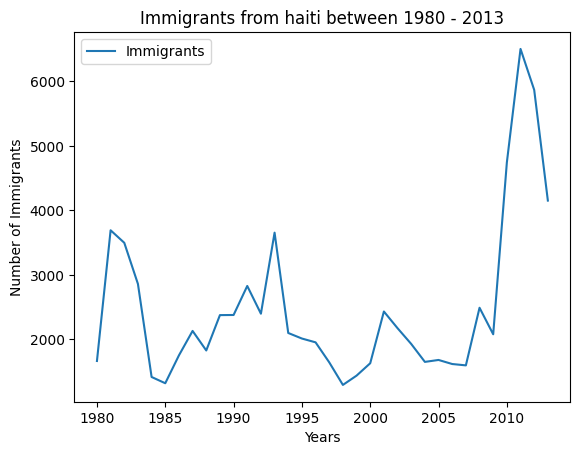

In [30]:
# Creating data for plotting
df_can.reset_index(inplace=True, drop=True)
haiti = df_can[df_can['Country'] == 'Haiti']

haiti = haiti[years].T

haiti.index = haiti.index.map(int)

fig, ax = plt.subplots()
ax.plot(haiti)

ax.set_title('Immigrants from haiti between 1980 - 2013')
ax.set_xlabel('Years')
ax.set_ylabel('Number of Immigrants')

# Grid
# plt.grid(True) # or # ax.grid()

plt.legend(['Immigrants']) # or # ax.legend()

plt.show()

#### We can clearly notice how number of immigrants from Haiti spiked up from 2010 as Canada stepped up its efforts to accept refugees from Haiti. <br>Let's annotate this spike in the plot by using the *ax.annotate()* method.

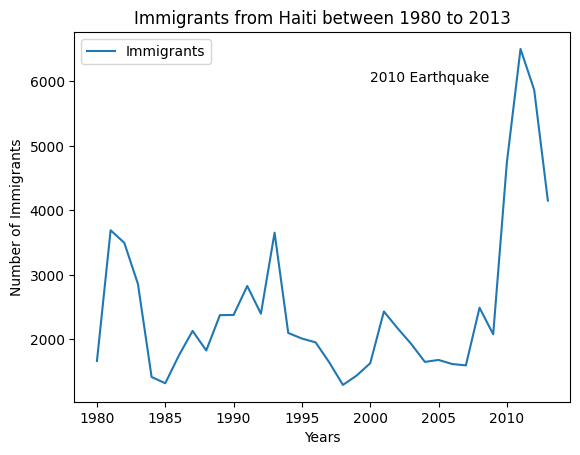

In [31]:
fig, ax = plt.subplots()

ax.plot(haiti)

#Setting up the Title
ax.set_title('Immigrants from Haiti between 1980 to 2013') 

#Setting up the Labels
ax.set_xlabel('Years')
ax.set_ylabel('Number of Immigrants')

plt.legend(['Immigrants'])

plt.annotate('2010 Earthquake', xy=(2000, 6000))

plt.show()